In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

plt.rcParams['font.size'] = 11
plt.rcParams['figure.dpi'] = 120

In [2]:
# Physical constants
# Note that we need a lot of precision here, since some values are
# squared, cubed, etc.
hbar = 1.054571817e-34 # Planck constants [J/s]
c = 2.99792458e8 # Speed of light [m/s]
me = 9.1093837015e-31 # Electron mass [kg]
e0 = 8.8541878128e-12 # Vacuum permittivity [F/m]
e = 1.602176634e-19 # Elementary charge [Q]
a = .529177210903e-10 # Bohr radius [m]
mp = 1.67262192369e-27 # Proton mass [kg]
EBohr = -13.605693122994 # Bohr energy, [eV]

# Reduced mass correction
#me = me*mp / (mp + me)

# What we expect the optimal value of the parameter b to be
analyticB = 1/a

In [8]:
# These were derived analytically; for full derivation, see paper
def ExpH(b):
    return (-b * e**2 / (4 * np.pi * e0) + hbar**2 * b**2 / (2 * me) - hbar**4 * b**4 / (8 * me**3 * c**2))/e

def ddbExpH(b):
    return (-e**2 / (4 * np.pi * e0) + hbar**2 * b / me - hbar**4 * b**3 / (2 * me**3 * c**2))/e

# We also want to be able to evaluate just the relativistic term, since it is so small
def relativisticCorrection(b):
    return (- hbar**4 * b**4 / (8 * me**3 * c**2))/e

Calculated 1/b: 5.29161334475323e-11 m
Analytic Bohr radius: 5.29177210903e-11 m
Variational relativistic correction: -0.0001811521353554502 eV
Analytic relativistic correction: -0.0009056519849917295 eV


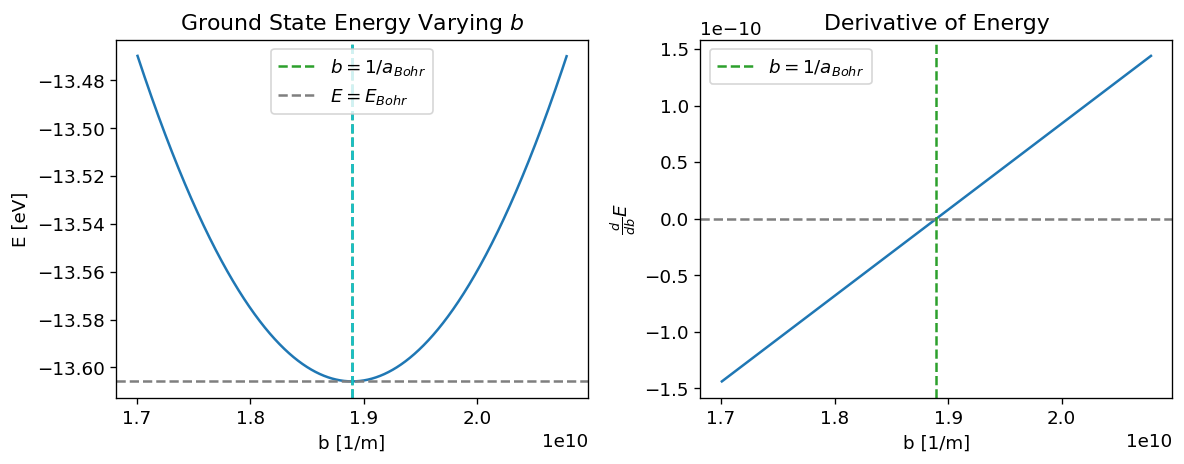

In [12]:
bArr = np.linspace(analyticB*.9, analyticB*1.1, 10000)

vec_ExpH = np.vectorize(ExpH)
vec_ddbExpH = np.vectorize(ddbExpH)

EArr = vec_ExpH(bArr)
ddbEArr = vec_ddbExpH(bArr)

optimalB = bArr[np.argmin(EArr)]

print(f'Calculated 1/b: {1/optimalB} m')
print(f'Analytic Bohr radius: {a} m')

print(f'Variational relativistic correction: {relativisticCorrection(optimalB)} eV')
print(f'Analytic relativistic correction: {(- (EBohr*e)**2 / (2*me*c**2) * 5) / e} eV')

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(bArr, EArr)
ax[0].axvline(analyticB, linestyle='--', color='tab:green', label=r'$b=1/a_{Bohr}$')
ax[0].axvline(optimalB, linestyle='--', color='tab:cyan')
ax[0].axhline(y=EBohr, linestyle='--', color='tab:gray', label=r'$E=E_{Bohr}$')
ax[0].set_xlabel('b [1/m]')
ax[0].set_ylabel('E [eV]')
#ax[0].set_xscale('log')
ax[0].legend()
ax[0].set_title('Ground State Energy Varying $b$')

ax[1].plot(bArr, vec_ddbExpH(bArr))
ax[1].axvline(analyticB, linestyle='--', color='tab:green', label=r'$b=1/a_{Bohr}$')
ax[1].axhline(y=0, linestyle='--', color='tab:gray')
ax[1].set_xlabel('b [1/m]')
ax[1].set_ylabel(r'$\frac{d}{db} E$')
#ax[1].set_xscale('log')
ax[1].legend()
ax[1].set_title('Derivative of Energy')
fig.tight_layout()

plt.savefig('fine_structure_variation.png')
plt.show()

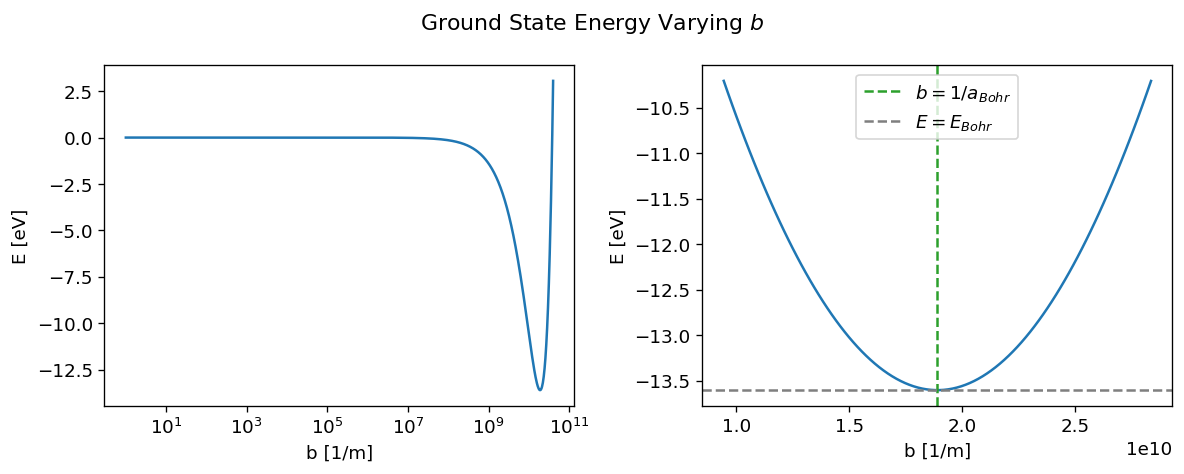

In [6]:
bArrWide = 10**np.linspace(0, 10.6, 1000)
bArr = np.linspace(.5*analyticB, 1.5*analyticB, 100)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(bArrWide, ExpH(bArrWide))
#ax[0].axvline(analyticB, linestyle='--', color='tab:green', label=r'$b=1/a_{Bohr}$')
#ax[0].axvline(optimalB, linestyle='--', color='tab:cyan')
#ax[0].axhline(y=EBohr, linestyle='--', color='tab:gray', label=r'$E=E_{Bohr}$')
ax[0].set_xlabel('b [1/m]')
ax[0].set_ylabel('E [eV]')
ax[0].set_xscale('log')
#ax[0].legend()

ax[1].plot(bArr, ExpH(bArr))
ax[1].axvline(analyticB, linestyle='--', color='tab:green', label=r'$b=1/a_{Bohr}$')
#ax[1].axvline(optimalB, linestyle='--', color='tab:cyan')
ax[1].axhline(y=EBohr, linestyle='--', color='tab:gray', label=r'$E=E_{Bohr}$')
ax[1].set_xlabel('b [1/m]')
ax[1].set_ylabel('E [eV]')
#ax[1].set_xscale('log')
ax[1].legend()

fig.suptitle('Ground State Energy Varying $b$')
fig.tight_layout()

plt.savefig('h_gs_wide.png')
plt.show()